# İstatistik Sihri ve Dünya Savaşları

Sayılar arası ilişki kurma becerisi bazen sihirli gibi gözüken şeyleri başarmayı sağlar. Derin öğrenme sayesinde devasa miktardaki veri arasında bu bağları kurmak daha kolaydır ancak profesyonellerin becerilerinin neler yapabileceğini görmek şaşırtıcı.

İkinci dünya savaşı sırasında istatistikçiler alman tanklarının seri numaralarından yola çıkarak toplam tank sayısını tahmin ettiler. Ancak unutulmaması gereken şey ellerinde sadece bazı tanklara ait seri numaraları bulunuyordu. Peki bunu nasıl yaptılar?

Öncelikle Bayes teoremini biraz anlayalım. bu elimizdeki bilgiye yenileri eklendikçe olasılık tahminlerimizdeki değişimi gösterir.

Örneğin kesinlikle 2 çocuğu olan bir ailenin en az 1 erkek çocuğu olma ihtimali %75 olacaktır. Çünkü ihtimaller kız-kız / erkek-erkek / kız -erkek / erkek - kız şeklindedir. Bu 4 ihtimalden 3 ü şartımızı sağlar. 

Peki ya birisi bize bu ailenin kesinlikle en az 1 kız çocuğu olduğunu söylerse?

artık ihtimal havuzumuz kız-kız  / kız -erkek / erkek - kız  olacaktır. Artık erkek çocuk olma ihtimal 3te 2 yani yaklaşık %66 oldu.

Her doğumda kız ya da erkek olma oranı önceki çocuklardan bağımsızdır. Ancak olaylar olduktan sonra eldeki bilgiler arttıkça olasılık yapısı değişir.



<div style="text-align: center;">
    <img src="bayes1.png" alt="bayes" style="height:300px;" />
</div>

P(A|B) = B olayı gerçekleştiğinde A olayının gerçekleşme olasılığı <br>
P(A) = A olayının gerçekleşme olasılığı <br>
P(B|A) = A olayı gerçekleştiğinde B olayının gerçekleşme olasılığı <br>
P(B) = B olayının gerçekleşme olasılığı <br>

 Bir araştırmaya göre her 43 çocuktan 1 tanesi, yetişkinlikte ortaya çıkan belli bir hastalığa yakalanmakta ve tam güvenilir olmamasına rağmen yapılan test sonuçlarına göre, hastalıklı bir çocuğun testi %80 pozitif, sağlıklı bir çocuğun testi ise %10 pozitif sonuç vermektedir. Bu bilgilere göre test sonucu pozitif olan bir çocuğun gerçekten hasta olma olasılığı nedir? <br>
        
P(A) : Çocuğun hasta olması olasılığı = 1/43  <br>        
P(B) : Testin pozitif çıkması olasılığı = 1/43 * 0.80 + 42/43 * 0.10 = 5/43 <br>           
P(A|B) : Pozitif çıkan testin hastalık çıkma olasılığı ( sorulan bu )     <br>   
P(B|A) : Hastalıklı çocuğun testinin pozitif çıkma olasılığı = 0.80   <br>      
      
P(A|B)=P(B|A)*P(A)/P(B) => (0.80 * 1/43) / (5/43) = 0.16 = %16 bulunur.

Peki tanklara geri dönelim. Tanklarda durum şuydu her yeni elde edilen tank parçası ve üzerindeki seri numarası elde edilen yeni bir bilgi olacaktı.  Bunu bir torbadan çekilen toplara benzetebiliriz. Her topun ise bir numarası olduğunu düşünelim. bu numaralar  1,2,3,4,.....x şeklinde 1 den x'e devam etsin.  Çekilen topların numaralarının dağlımı uniform mu normal(gaussian) mı olmalı?

<div style="text-align: center;">
    <img src="distr.png" alt="bayes" style="height:200px;" />
</div>

Basitçe test edelim

282
[19, 54, 230]


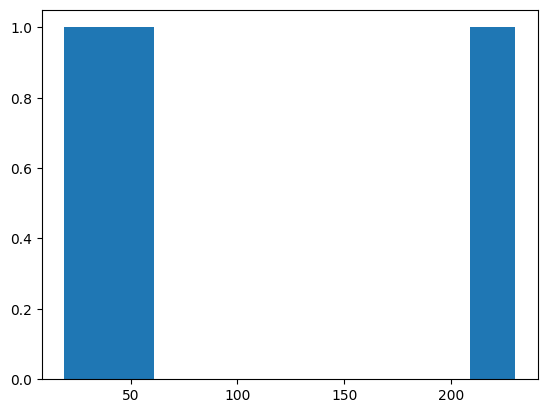

In [88]:
import random
import matplotlib.pyplot as plt
import numpy as np

dataAmount = random.randint(1,10)

maxNumber = random.randint(20, 300)

results = []

# sadece aynı değilse ekle çünkü aynı topu iki kere çekemezsin
while len(results)<dataAmount:
    a = random.randint(0, maxNumber)
    if a not in results:
        results.append(a)

print(maxNumber)
results.sort()
print(results)

npArrResults = np.array(results)
plt.hist(npArrResults)
plt.show() 